# Chi-Square

1. Goodness of Fit Test (Uygunluk Testi)
2. Test of Homogeneity (Homojenlik Testi)
3. Test of Independence (Bağımsızlık Testi)

## Test of Independence Test

In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import scipy.stats as stats

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Örnek verilerimizi oluşturalım 
# 'Cinsiyet' değişkeni için, her bir cinsiyeti temsil eden 'Erkek' ve 'Kadın' string değerlerini //
# // belirli sayıda tekrar ettirdik. Bu tekrar etme işlemi Python'da * operatörü ile gerçekleştirilir. // 
# //Örneğin, ['Erkek'] * 10 ifadesi 'Erkek' değerini 10 kez tekrarlayan bir liste oluşturur.

# 'Kurs' değişkeni için, her bir kursu temsil eden 'Kurs1', 'Kurs2' ve 'Kurs3' string değerlerini belirli sayıda tekrar ettirdik. Bu tekrarlamalar, her bir kursa kaydolan öğrenci sayısını temsil eder.


data = {'Cinsiyet': ['Erkek'] * 10 + ['Erkek'] * 20 + ['Erkek'] * 30 + ['Kadın'] * 20 + ['Kadın'] * 15 + ['Kadın'] * 30,
        'Kurs': ['Kurs1'] * 10 + ['Kurs2'] * 20 + ['Kurs3'] * 30 + ['Kurs1'] * 20 + ['Kurs2'] * 15 + ['Kurs3'] * 30}

df = pd.DataFrame(data)
df


,Cinsiyet,Kurs
0,Erkek,Kurs1
1,Erkek,Kurs1
2,Erkek,Kurs1
3,Erkek,Kurs1
4,Erkek,Kurs1
...,...,...
120,Kadın,Kurs3
121,Kadın,Kurs3
122,Kadın,Kurs3
123,Kadın,Kurs3


In [5]:
# Kontenjan tablosunu oluşturalım
contingency_table = pd.crosstab(df['Cinsiyet'], df['Kurs'])

print("Kontenjan Tablosu:")
print(contingency_table)



Kontenjan Tablosu:
Kurs      Kurs1  Kurs2  Kurs3
Cinsiyet                     
Erkek        10     20     30
Kadın        20     15     30


In [6]:
# Bu tabloyu Chi-square testine sokalım
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)



In [7]:
# Sonuçları yazdıralım
print(f"\nChi-Square Statistic : {chi2}")
print(f"P-Value : {p_value}")
print(f"Degrees of Freedom : {dof}")
print(f"Expected Table: \n {expected}")




Chi-Square Statistic : 3.8537851037851034
P-Value : 0.14559994049722333
Degrees of Freedom : 2
Expected Table: 
 [[14.4 16.8 28.8]
 [15.6 18.2 31.2]]


In [8]:
# p-değerini 0.05 ile karşılaştıralım ve hipotezi kabul edip etmeme kararını verelim
alpha = 0.05
if p_value < alpha:
    print("\nNull hipotezi reddediyoruz. Bu, kursa katılımın ve cinsiyetin bağımsız olmadığını gösterir.")
else:
    print("\nNull hipotezi kabul ediyoruz. Bu, kursa katılımın ve cinsiyetin bağımsız olduğunu gösterir.")


Null hipotezi kabul ediyoruz. Bu, kursa katılımın ve cinsiyetin bağımsız olduğunu gösterir.


## Goodness-of-Fit Test

## Data Uretimi

Bir web sitesi sahibi olan Christopher, web sitesine abonelik satın alan kişilere ücretsiz bir hediye sunmak istiyor. Yeni aboneler eşit değerde üç hediyeden birini seçebilir: hediye çeki, sevimli oyuncak veya ücretsiz sinema biletleri. 900 kişi kaydolduktan sonra Christopher, sunulan üç hediyenin eşit derecede popüler olup olmadığını görmek için rakamları gözden geçirmek istiyor.Bu 3 hediyenini hepsi eşit seviyede popüler mi?

In [3]:
# itertools kütüphanesi açıklama: https://docs.python.org/3/library/itertools.html

from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import itertools

In [4]:
# data seti oluşturalım
# e:hediye çeşitleri..soru metninden alındı..  
# n: bu hediyeyi alanların sayısı

e = ["Gift Certificate", "Cuddly Toy", "Cinema Tickets"]
n = [315, 265, 320]

In [5]:
# kategorik veri uretimini e ve n degerlerine gore yapalım

list(itertools.repeat(e[0], n[0]))

['Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certificate',
 'Gift Certif

In [6]:
#herbir hediye icin verilen n sayısında uretelim

it1 = np.array(list(itertools.repeat(e[0], n[0])))
it2 = np.array(list(itertools.repeat(e[1], n[1])))
it3 = np.array(list(itertools.repeat(e[2], n[2])))

In [7]:
# yukarda uretilen array leri cncat yapalım
# bu bolumde chi-square ıcın data uretiyoruz

gift_type = np.concatenate([it1, it2, it3])
gift_type

array(['Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certificate',
       'Gift Certificate', 'Gift Certificate', 'Gift Certifica

In [8]:
# 900 data nın kontrolu
    
len(gift_type)

900

## One-way Chi-square Test (Goodness of Fit test)

In [9]:
# observed degerler yukarda n dizisi ile uretildi
# expected value olarak 300-300-300 estlik durumunu inceleyelim
# observed degerlerle expcted degerler arasında anlamlı fark var mı ?

<i>H<i/><sub>0</sub>: "there is no significant difference between the observed and the expected (theoretical) distribution"<br>
<i>H<i/><sub>1</sub>: "there is a significant difference between the observed and the expected (theoretical) distribution"

In [ ]:
# alttaki tabloda hediye isimleri ve observed-expected valu degerler goruluyor

<table>
    <tbody>
        <tr>
            <td>&nbsp;</td>
            <td><em>Observed</em></td>
            <td><em>Expected</em></td>
            <td><em>Difference</em></td>
            <td><em>Difference Sq.</em></td>
            <td><em>Diff. Sq. / Exp Fr.</em></td>
        </tr>
        <tr>
            <td><span id="ctl00_MainContent_Label6"><b>Gift Certificate</b></span></td>
            <td><span id="ctl00_MainContent_Label100">315</span></td>
            <td><span id="ctl00_MainContent_Label105">300</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label110">15.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label115">225.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label120">0.75</span></td>
        </tr>
        <tr>
            <td><span id="ctl00_MainContent_Label7"><b>Cuddly Toy</b></span></td>
            <td><span id="ctl00_MainContent_Label101">265</span></td>
            <td><span id="ctl00_MainContent_Label106">300</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label111">-35.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label116">1225.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label121">4.08</span></td>
        </tr>
        <tr>
            <td><span id="ctl00_MainContent_Label8"><b>Cinema Tickets</b></span></td>
            <td><span id="ctl00_MainContent_Label102">320</span></td>
            <td><span id="ctl00_MainContent_Label107">300</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label112">20.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label117">400.00</span></td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label122">1.33</span></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
        </tr>
        <tr>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;</td>
            <td>&nbsp;&nbsp;<span id="ctl00_MainContent_Label125">6.167</span></td>
        </tr>
    </tbody>
</table>

In [ ]:
# Chi-square= 6,167 (üstteki rakamların toplamı)
#  tablodaki 0.75 degeri : Diff Sq/Exp.Fr: 225/300 olarak elde edilir 

In [11]:
# scipy üzerınden chi-sqaure fonksiyonu kullanalım
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
# df = level sayısı -1 : 3-1 = 2 

pvalue = 1 - stats.chi2.cdf(6.167, 2)
pvalue

0.045798680423089544

In [ ]:
# p value < alpha olduğu için null hipotez reddedilir
# aralarındaki fark anlamlıdır

## scipy.stats.chisquare modulu aynı hesabın yapılması

In [12]:
levels, counts = np.unique(gift_type, return_counts=True)

In [13]:
# yukardaki count icin chisquare hesaplayalım

test = stats.chisquare(counts)
test

Power_divergenceResult(statistic=6.166666666666666, pvalue=0.04580631417262148)

In [15]:
# yukardaki sonucu bu sekilde de bulaiblilriz

est = stats.chisquare([320,265,315])
est

Power_divergenceResult(statistic=6.166666666666666, pvalue=0.04580631417262148)

In [16]:
#hipotezin sonucunu yazdıralım

print('Statistics=%.3f, p=%.3f' % (test.statistic, test.pvalue))
# interpret
alpha = 0.05
if test.pvalue > alpha:
	print('there is no significant difference between the observed and the theoretical distribution (fail to reject H0)')
else:
	print('there is a significant difference between the observed and the theoretical distribution (reject H0)')

Statistics=6.167, p=0.046
there is a significant difference between the observed and the theoretical distribution (reject H0)


# Chi-Square Test of Association (Test of Independence)

In [ ]:
# 2 kategorik veri olacak..  bu kategoriler birbirinden bagımsız mı ?
# 2 kategorik data arasındaki ilişki için ise Chi-Square association bakılır

Problem:
Veri setinde, katılımcılara cinsiyetleri ve sigara içip içmedikleri sorulmuştur. Üç cevap seçeneği vardı: Sigara İçmeyen, Geçmişte sigara içen ve Halen sigara içen. Sigara içme davranışı (sigara içmeyen, halen sigara içen veya geçmişte sigara içen) ile cinsiyet (erkek veya kadın) arasındaki ilişkiyi Ki-Kare Bağımsızlık Testi kullanarak test etmek istediğimizi varsayalım (α = 0.05 kullanacağız).

In [18]:
survey = pd.read_csv("university_survey_2014.csv")
survey.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3


In [19]:
# smokinhg behaviour ile gender sütunları arasındaki ilişkiye bakacağız

In [20]:
testset = survey[["Gender", "Smoking"]]
testset

,Gender,Smoking
0,0,0
1,0,0
2,0,0
3,1,
4,1,2
...,...,...
430,1,0
431,0,0
432,0,0
433,1,2


In [21]:
# smoking ve gender object type oldukları için numeric dataya cevirelim

testset["Gender"] = pd.to_numeric(testset["Gender"],errors='coerce')
testset["Smoking"] = pd.to_numeric(testset["Smoking"],errors='coerce')

C:\Users\pc\AppData\Local\Temp\ipykernel_12260\3234983263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset["Gender"] = pd.to_numeric(testset["Gender"],errors='coerce')
C:\Users\pc\AppData\Local\Temp\ipykernel_12260\3234983263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset["Smoking"] = pd.to_numeric(testset["Smoking"],errors='coerce')


In [22]:
# smoking deki kategorileri degiselim

testset["Smoking"] = testset["Smoking"].replace([0,1,2],["Nonsmoker", "Past smoker","Current smoker"])
testset["Smoking"]

C:\Users\pc\AppData\Local\Temp\ipykernel_12260\875698694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset["Smoking"] = testset["Smoking"].replace([0,1,2],["Nonsmoker", "Past smoker","Current smoker"])


0           Nonsmoker
1           Nonsmoker
2           Nonsmoker
3                 NaN
4      Current smoker
            ...      
430         Nonsmoker
431         Nonsmoker
432         Nonsmoker
433    Current smoker
434       Past smoker
Name: Smoking, Length: 435, dtype: object

In [23]:
#gender kategorisini degisleim

testset["Gender"] = testset["Gender"].replace([0, 1],["Male", "Female"])

testset["Gender"]

C:\Users\pc\AppData\Local\Temp\ipykernel_12260\1590591299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset["Gender"] = testset["Gender"].replace([0, 1],["Male", "Female"])


0        Male
1        Male
2        Male
3      Female
4      Female
        ...  
430    Female
431      Male
432      Male
433    Female
434    Female
Name: Gender, Length: 435, dtype: object

In [24]:
# crosstab ın kılsayması olarak carpraz tabloyu kullanmıs olalım

ct = pd.crosstab(testset["Smoking"], testset["Gender"], margins=False)
ct

Gender,Female,Male
Smoking,,
Current smoker,37,31
Nonsmoker,148,149
Past smoker,24,13


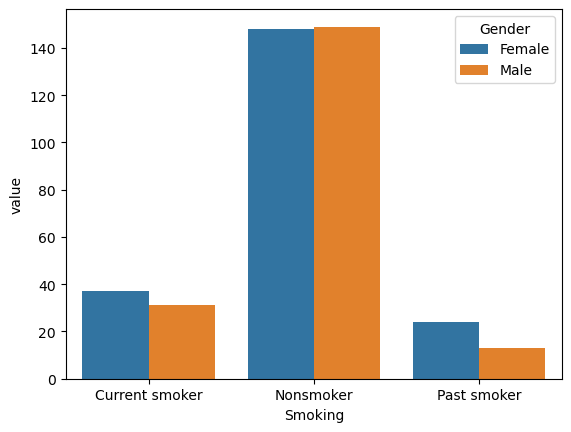

In [25]:
# tabloyu grafize edelim

stacked = ct.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Smoking, y=stacked.value, hue=stacked.Gender);

## Manual Hesap

In [ ]:
# ilk tablo observed degerler

<table border="1" cellspacing="0">
    <tbody>
        <tr>
            <td width="100">&nbsp;</td>
            <td width="100"><b>Female</b></td>
            <td width="100"><b>Male</b></td>
            <td width="100"><b>Total</b></td>
        </tr>
        <tr>
            <td width="100"><b>Current smoker</b></td>
            <td width="100">37</td>
            <td width="100">31</td>
            <td width="100">68</td>
        </tr>
        <tr>
            <td width="100"><b>Nonsmoker</b></td>
            <td width="100">148</td>
            <td width="100">149</td>
            <td width="100">297</td>
        </tr>
        <tr>
            <td width="100"><b>Past smoker</b></td>
            <td width="100">24</td>
            <td width="100">13</td>
            <td width="100">37</td>
        </tr>
        <tr>
            <td width="100"><b>Total</b></td>
            <td width="100">209</td>
            <td width="100">193</td>
            <td width="100"><b>402</b></td>
        </tr>
    </tbody>
</table><br>

In [ ]:
# 2. tablo ise expected value..  
# tablodaki hesaplama biçimini derste gorduk

<table border="1" cellspacing="0">
    <tbody>
        <tr>
            <td width="100"><b>Expected Values</b></td>
            <td width="100"><b>Female</b></td>
            <td width="100"><b>Male</b></td>
            <td width="100"><b>Total</b></td>
        </tr>
        <tr>
            <td width="100"><b>Current smoker</b></td>
            <td width="100"><span aria-hidden="true">\(  \frac{209*68}{402}  \)​=35.353</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{193*68}{402} \)​<span aria-hidden="true">​=32.647</span></td>
            <td width="100">68</td>
        </tr>
        <tr>
            <td width="100"><b>Nonsmoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{209*297}{402} \)<span aria-hidden="true">=154.41</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{193*297}{402} \)​<span aria-hidden="true">​</span><span aria-hidden="true">​=142.59</span></td>
            <td
                width="100">297</td>
        </tr>
        <tr>
            <td width="100"><b>Past smoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{209*37}{402} \)​<span aria-hidden="true">​=19.236</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{193*37}{402} \)​<span aria-hidden="true">​</span><span aria-hidden="true">​=17.764</span></td>
            <td
                width="100">37</td>
        </tr>
        <tr>
            <td width="100"><b>Total</b></td>
            <td width="100">209</td>
            <td width="100">193</td>
            <td width="100"><b>402</b></td>
        </tr>
    </tbody>
</table>
<p><br></p>

In [ ]:
# 3. tabloda kikare hesabını yapıyoruz..exp valu eve observed value arası farkı gorelim
# alttaki kikare hesabında 3.tablodaki degerler toplanır

<table border="1" cellspacing="0">
    <tbody>
        <tr>
            <td width="100"><b>Squared Distances</b></td>
            <td width="100"><b>Female</b></td>
            <td width="100"><b>Male</b></td>
        </tr>
        <tr>
            <td width="100"><b>Current smoker</b></td>
            <td width="100"><span aria-hidden="true">\(  \frac{ (37−35.353)^2 }{35.353}  \)=0.077</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (31−32.647)^2 }{32.647} \)<span aria-hidden="true">​=0.083</span></td>
        </tr>
        <tr>
            <td width="100"><b>Nonsmoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (148−154.41)^2 }{154.41} \)<span aria-hidden="true">=0.266</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (149−142.59)^2 }{142.59} \)<span aria-hidden="true">​=0.288</span></td>
        </tr>
        <tr>
            <td width="100"><b>Past smoker</b></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (24−19.236)^2 }{19.236} \)<span aria-hidden="true">=1.18</span></td>
            <td width="100"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><annotation encoding="application/x-tex"></annotation></semantics></math>\( \frac{ (13−17.764)^2 }{17.764} \)<span aria-hidden="true">=1.277</span></td>
        </tr>
    </tbody>
</table>
<p><br></p>

χ2 = 0.077+0.266+1.18+0.083+0.288+1.277 = **3.171**

In [26]:
# alttaki fonksiyonda parantez içinde ilk değer kikare, 2.değer ise df yani k değeri..
# k --> (row sayısı -1)*(kolumn sayısı-1) = 2
# p-value

1 - stats.chi2.cdf(3.171, 2)

0.20484534483444383

In [27]:
ct

Gender,Female,Male
Smoking,,
Current smoker,37,31
Nonsmoker,148,149
Past smoker,24,13


In [28]:
# ilave bir çözüm olarak aynı p degerini ct table ı kullanarak yapaibliriz

chi, p, dof, expctd = stats.chi2_contingency(ct)

In [29]:
print("statistic:", chi)
print("p value:", p)

statistic: 3.171256766693158
p value: 0.20481904779163018


In [ ]:
# 0.204 > alfa=0.05 oldugu için null hipotezi reddetmiyoruz, kabul ediyoruz

In [ ]:
# Cinsiyet ile sigara içme davranışı arasında ilişki bulunamadı